### **Prepare Dataset**

In [7]:
import pandas as pd


def load_dataset(file_path, timesteps=5):
    df = pd.read_excel(file_path)

    # Perform min-max normalization on column 'A'
    min_value = df['A'].min()
    max_value = df['A'].max()

    df['A'] = (df['A'] - min_value) / (max_value - min_value)

    # Create new columns for the next time steps
    if timesteps == 5:
      df['B'] = df['A'].shift(-1)
      df['C'] = df['A'].shift(-2)
      df['D'] = df['A'].shift(-3)
      df['E'] = df['A'].shift(-4)
      df['F'] = df['A'].shift(-5)
    if timesteps == 8:
      df['B'] = df['A'].shift(-1)
      df['C'] = df['A'].shift(-2)
      df['D'] = df['A'].shift(-3)
      df['E'] = df['A'].shift(-4)
      df['F'] = df['A'].shift(-5)
      df['G'] = df['A'].shift(-6)
      df['H'] = df['A'].shift(-7)
      df['I'] = df['A'].shift(-8)

    # Drop the rows with missing values
    df = df.dropna()

    # Convert the DataFrame to a NumPy array
    numpy_array = df.values

    return numpy_array

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(output):
    return 1 - output ** 2

# Mean Squared Error loss and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

class GRUCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.Wz = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wr = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wh = np.random.randn(hidden_size, hidden_size + input_size)
        self.bz = np.zeros(hidden_size)
        self.br = np.zeros(hidden_size)
        self.bh = np.zeros(hidden_size)
        self.Wy = np.random.randn(1, hidden_size)
        self.by = np.zeros(1)

    def forward(self, x, h_prev):
        self.x, self.h_prev = x, h_prev
        self.combined_h_prev_x = np.hstack((h_prev, x))
        self.r = sigmoid(np.dot(self.Wr, self.combined_h_prev_x) + self.br)
        self.z = sigmoid(np.dot(self.Wz, self.combined_h_prev_x) + self.bz)

        self.combined_h_prev_r_x = np.hstack((np.multiply(self.r, h_prev), x))
        self.h_hat = tanh(np.dot(self.Wh, self.combined_h_prev_r_x) + self.bh)
        self.h = np.multiply(self.z, self.h_prev) + \
                         np.multiply((1-self.z), self.h_hat)
        self.y_pred = np.dot(self.Wy, self.h) + self.by  # Output layer
        return self.y_pred, self.h

    def backward(self, dL_dy, dh_next, learning_rate):
        dy_dh = self.Wy

        dh = np.dot(dy_dh.T, dL_dy) + dh_next
        dh_hat = np.multiply(dh, (1-self.z)) * tanh_derivative(self.h_hat)

        dz = np.multiply(dh, self.h_prev-self.h_hat) * sigmoid_derivative(self.z)

        dr = np.multiply(np.dot(self.Wr[:hidden_size, :hidden_size], dh_hat), \
                         self.h_prev) * sigmoid_derivative(self.r)

        dWz = np.dot(dz.reshape(-1, 1), self.combined_h_prev_x.reshape(1, -1))
        dWr = np.dot(dr.reshape(-1, 1), self.combined_h_prev_x.reshape(1, -1))
        dWh = np.dot(dh_hat.reshape(-1, 1), self.combined_h_prev_r_x.reshape(1, -1))
        dWy = np.dot(dL_dy, self.h.reshape(1, -1))
        dby = dL_dy
        dbz = dz
        dbh = dh_hat
        dbr = dr

        # Update weights and biases
        self.Wz -= learning_rate * dWz
        self.Wr -= learning_rate * dWr
        self.Wh -= learning_rate * dWh
        self.bz -= learning_rate * dbz
        self.br -= learning_rate * dbr
        self.bh -= learning_rate * dbh
        self.Wy -= learning_rate * dWy
        self.by -= learning_rate * dby.reshape(-1)

        dcombined = np.dot(self.Wz[:self.hidden_size, :self.hidden_size].T, dz)\
                      + np.dot(dh, self.z) + \
                      np.dot(np.dot(self.Wh[:self.hidden_size, :self.hidden_size].T, dh_hat), self.r) + \
                      np.dot(self.Wr[:self.hidden_size, :self.hidden_size].T, dr)
        dh_prev = dcombined[:self.hidden_size]

        return dh_prev

ECG Dataset, Timesteps=5

Epoch:  1
Train MSE:  0.015923279373785047 Test MSE:  0.020124235729812073
Epoch:  2
Train MSE:  0.0018411253785365759 Test MSE:  0.01437179955699668
Epoch:  3
Train MSE:  0.0013638172566169135 Test MSE:  0.009292933117422643
Epoch:  4
Train MSE:  0.0009771929372771125 Test MSE:  0.005512754371381238
Epoch:  5
Train MSE:  0.0007040033848353192 Test MSE:  0.0032536170454638127
Epoch:  6
Train MSE:  0.0005246302487301043 Test MSE:  0.002040270366779411
Epoch:  7
Train MSE:  0.0004103919777416585 Test MSE:  0.0014010280027645778
Epoch:  8
Train MSE:  0.0003367150491874071 Test MSE:  0.0010593323225585312
Epoch:  9
Train MSE:  0.0002876054812617485 Test MSE:  0.0008740415215823233
Epoch:  10
Train MSE:  0.00025363069501147667 Test MSE:  0.0007746925324776626
Epoch:  11
Train MSE:  0.0002293108518554984 Test MSE:  0.0007251593930447095
Epoch:  12
Train MSE:  0.00021140125386325597 Test MSE:  0.0007058008171251941
Epoch:  13
Train MSE:  0.00019791348546421568 Test MSE:  0.0007050351316019649

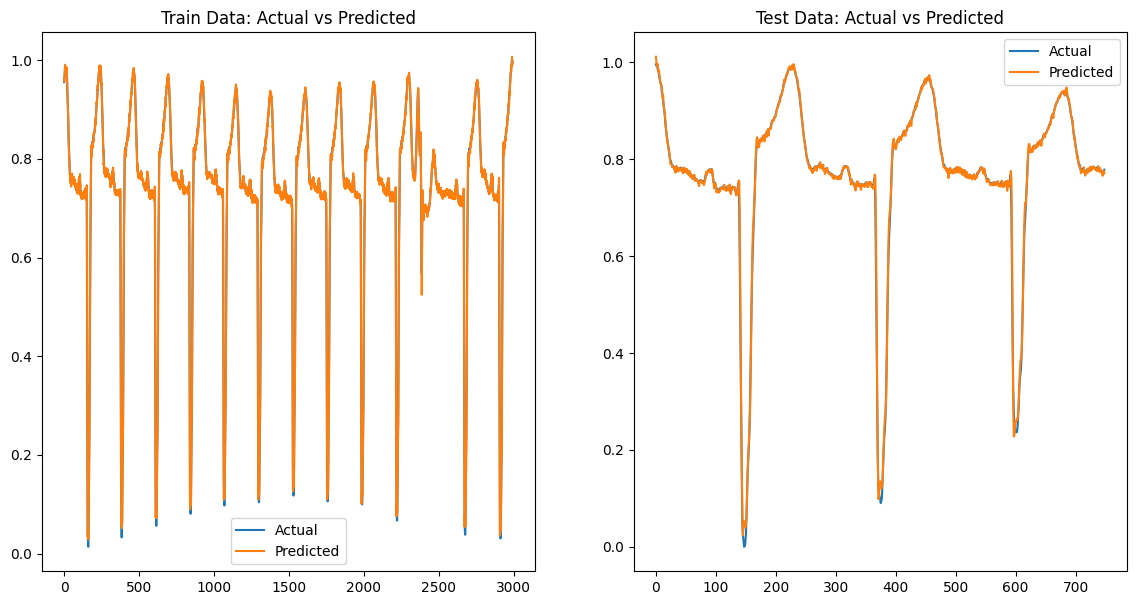

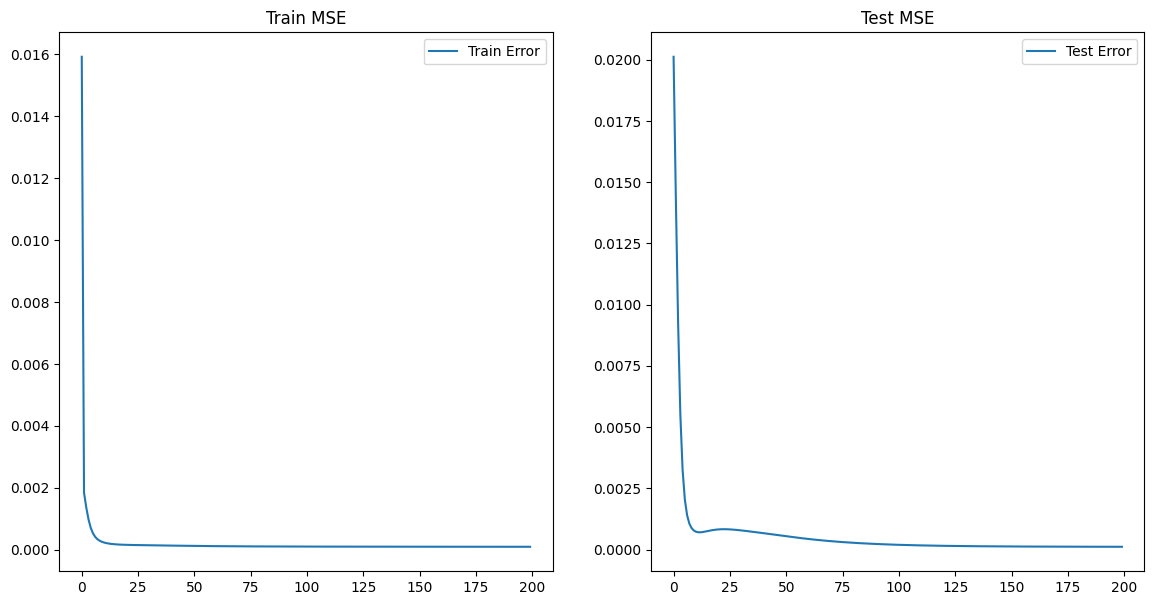

In [19]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(42)
# Initialize parameters
input_size = 1
hidden_size = 4
learning_rate = 0.001
epochs=200
# Load data from the Excel file
file_path = ['ECG Datasets.xlsx']
timesteps = [5, 8]
numpy_array = load_dataset(file_path[0], timesteps[0])

# Initialize LSTM cell
gru_cell = GRUCell(input_size, hidden_size)

# Split data
X = numpy_array[:, :-1]
Y = numpy_array[:, -1]
split_index = int(0.8 * len(X))
X_train_seq, Y_train_seq = X[:split_index], Y[:split_index]
X_test_seq, Y_test_seq = X[split_index:], Y[split_index:]

train_predictions = []
test_predictions = []

h = np.zeros(hidden_size)

train_errors = []
test_errors = []

# Training loop
for epoch in range(epochs):
    print("Epoch: ", epoch+1)
    train_predictions = []
    test_predictions = []
    for t in range(len(X_train_seq)):
        x_seq, y_true = X_train_seq[t], Y_train_seq[t]
        for x in x_seq:
            y_pred, h = gru_cell.forward(x, h)
        train_predictions.append(y_pred.item())
        dL_dy = mse_loss_derivative(y_true, y_pred)
        dh_next = np.zeros_like(h)
        for x in reversed(x_seq):
            dh_prev = gru_cell.backward(dL_dy, dh_next, learning_rate)
            dh_next = dh_prev

    h = np.zeros(hidden_size)
    for t in range(len(X_test_seq)):
        x_seq, y_true = X_test_seq[t], Y_test_seq[t]
        for x in x_seq:
            y_pred, h = gru_cell.forward(x, h)
        test_predictions.append(y_pred.item())

    # compute train error per epoch
    train_error = mse_loss(Y_train_seq, train_predictions)
    train_errors.append(train_error)

    # compute test error per epoch
    test_error = mse_loss(Y_test_seq, test_predictions)
    test_errors.append(test_error)
    print("Train MSE: ", train_error, "Test MSE: ", test_error)



# Plotting train predictions vs actual data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(Y_train_seq)), Y_train_seq, label="Actual")
plt.plot(np.arange(len(train_predictions)), train_predictions, label="Predicted", linestyle='-')
plt.title("Train Data: Actual vs Predicted")
plt.legend()

# Plotting test predictions vs actual data
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(Y_test_seq)), Y_test_seq, label="Actual")
plt.plot(np.arange(len(test_predictions)), test_predictions, label="Predicted", linestyle='-')
plt.title("Test Data: Actual vs Predicted")
plt.legend()
plt.show()

# Plotting Train MSE
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(np.arange(epochs), train_errors, label="Train Error")
plt.title("Train MSE")
plt.legend()

# Plotting Test MSE
plt.subplot(1, 2, 2)
plt.plot(np.arange(epochs), test_errors, label="Test Error")
plt.title("Test MSE")
plt.legend()
plt.show()



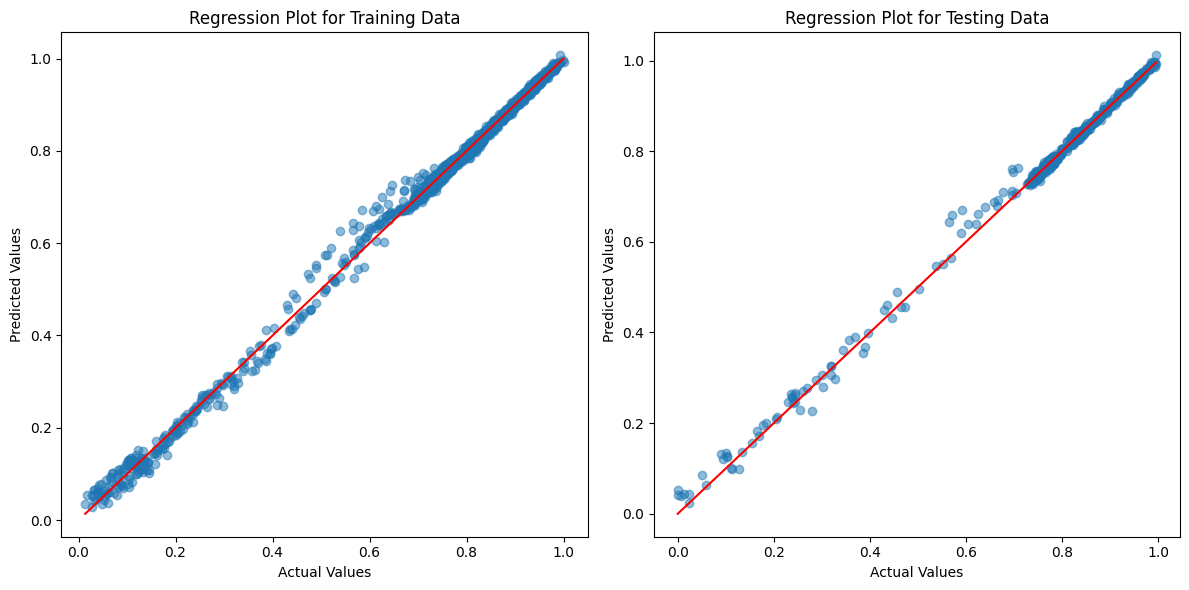

In [20]:
import matplotlib.pyplot as plt


# Plot regression for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_train_seq, train_predictions, alpha=0.5)
plt.title("Regression Plot for Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(Y_train_seq), max(Y_train_seq)], [min(Y_train_seq), max(Y_train_seq)], color='red')
# Plot regression for testing data
plt.subplot(1, 2, 2)
plt.scatter(Y_test_seq, test_predictions, alpha=0.5)
plt.title("Regression Plot for Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(Y_test_seq), max(Y_test_seq)], [min(Y_test_seq), max(Y_test_seq)], color='red')

plt.tight_layout()
plt.show()


ECG Dataset, Timesteps=8

Epoch:  1
Train MSE:  0.004503854338558957 Test MSE:  0.019565143483454235
Epoch:  2
Train MSE:  0.006811968336502053 Test MSE:  0.025665235844966498
Epoch:  3
Train MSE:  0.0019038291410513935 Test MSE:  0.00797738970542531
Epoch:  4
Train MSE:  0.0012782538328152797 Test MSE:  0.0035761883319159493
Epoch:  5
Train MSE:  0.0009792404283026344 Test MSE:  0.0022568796513929724
Epoch:  6
Train MSE:  0.0008439123570663623 Test MSE:  0.0018304122298439937
Epoch:  7
Train MSE:  0.000785953134731878 Test MSE:  0.0016448017125862398
Epoch:  8
Train MSE:  0.000752832392602852 Test MSE:  0.0015323372832845355
Epoch:  9
Train MSE:  0.0007278067280525217 Test MSE:  0.0014490580338374858
Epoch:  10
Train MSE:  0.0007070213986248285 Test MSE:  0.001381976398426332
Epoch:  11
Train MSE:  0.0006899404165407905 Test MSE:  0.00132619785607867
Epoch:  12
Train MSE:  0.0006763936635617986 Test MSE:  0.0012789084476357516
Epoch:  13
Train MSE:  0.0006659131186008177 Test MSE:  0.001237906401123512
Epoch: 

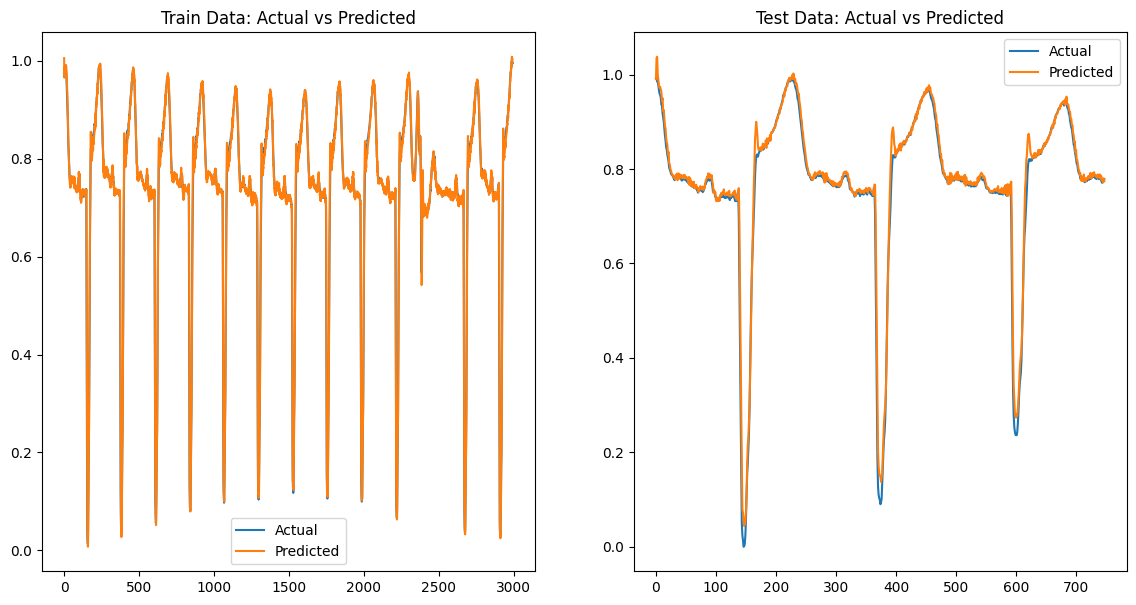

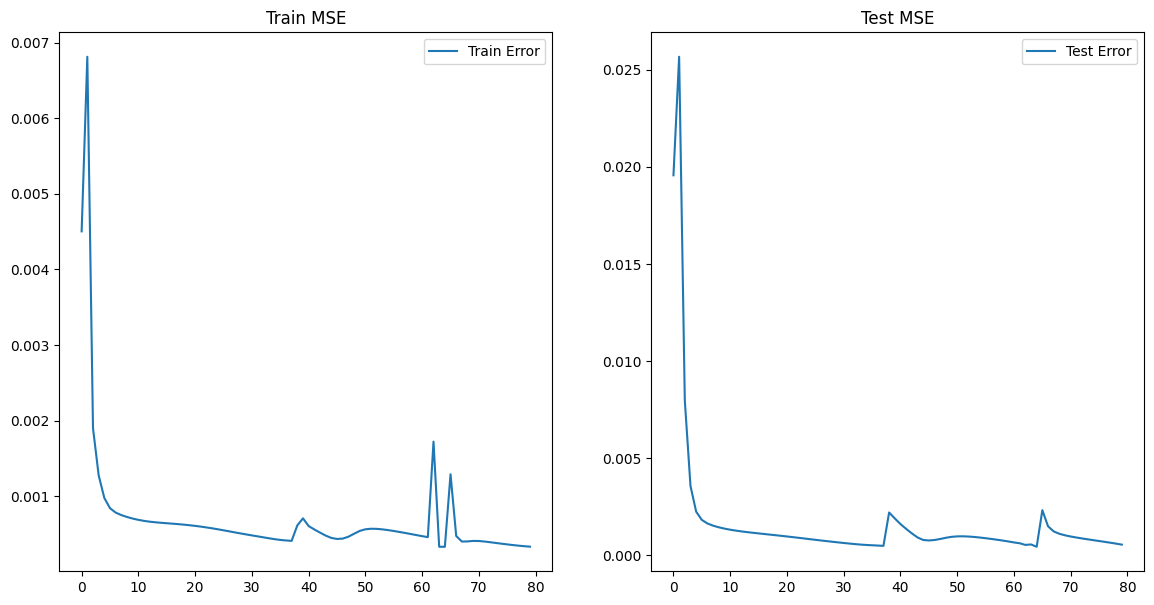

In [21]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(42)
# Initialize parameters
input_size = 1
hidden_size = 5
learning_rate = 0.001
epochs=80
# Load data from the Excel file
file_path = ['ECG Datasets.xlsx']
timesteps = [5, 8]
numpy_array = load_dataset(file_path[0], timesteps[1])

# Initialize LSTM cell
gru_cell = GRUCell(input_size, hidden_size)

# Split data
X = numpy_array[:, :-1]
Y = numpy_array[:, -1]
split_index = int(0.8 * len(X))
X_train_seq, Y_train_seq = X[:split_index], Y[:split_index]
X_test_seq, Y_test_seq = X[split_index:], Y[split_index:]

train_predictions = []
test_predictions = []

h = np.zeros(hidden_size)

train_errors = []
test_errors = []

# Training loop
for epoch in range(epochs):
    print("Epoch: ", epoch+1)
    train_predictions = []
    test_predictions = []
    for t in range(len(X_train_seq)):
        x_seq, y_true = X_train_seq[t], Y_train_seq[t]
        for x in x_seq:
            y_pred, h = gru_cell.forward(x, h)
        train_predictions.append(y_pred.item())
        dL_dy = mse_loss_derivative(y_true, y_pred)
        dh_next = np.zeros_like(h)
        for x in reversed(x_seq):
            dh_prev = gru_cell.backward(dL_dy, dh_next, learning_rate)
            dh_next = dh_prev

    h = np.zeros(hidden_size)
    for t in range(len(X_test_seq)):
        x_seq, y_true = X_test_seq[t], Y_test_seq[t]
        for x in x_seq:
            y_pred, h = gru_cell.forward(x, h)
        test_predictions.append(y_pred.item())

    # compute train error per epoch
    train_error = mse_loss(Y_train_seq, train_predictions)
    train_errors.append(train_error)

    # compute test error per epoch
    test_error = mse_loss(Y_test_seq, test_predictions)
    test_errors.append(test_error)
    print("Train MSE: ", train_error, "Test MSE: ", test_error)



# Plotting train predictions vs actual data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(Y_train_seq)), Y_train_seq, label="Actual")
plt.plot(np.arange(len(train_predictions)), train_predictions, label="Predicted", linestyle='-')
plt.title("Train Data: Actual vs Predicted")
plt.legend()

# Plotting test predictions vs actual data
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(Y_test_seq)), Y_test_seq, label="Actual")
plt.plot(np.arange(len(test_predictions)), test_predictions, label="Predicted", linestyle='-')
plt.title("Test Data: Actual vs Predicted")
plt.legend()
plt.show()

# Plotting Train MSE
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(np.arange(epochs), train_errors, label="Train Error")
plt.title("Train MSE")
plt.legend()

# Plotting Test MSE
plt.subplot(1, 2, 2)
plt.plot(np.arange(epochs), test_errors, label="Test Error")
plt.title("Test MSE")
plt.legend()
plt.show()



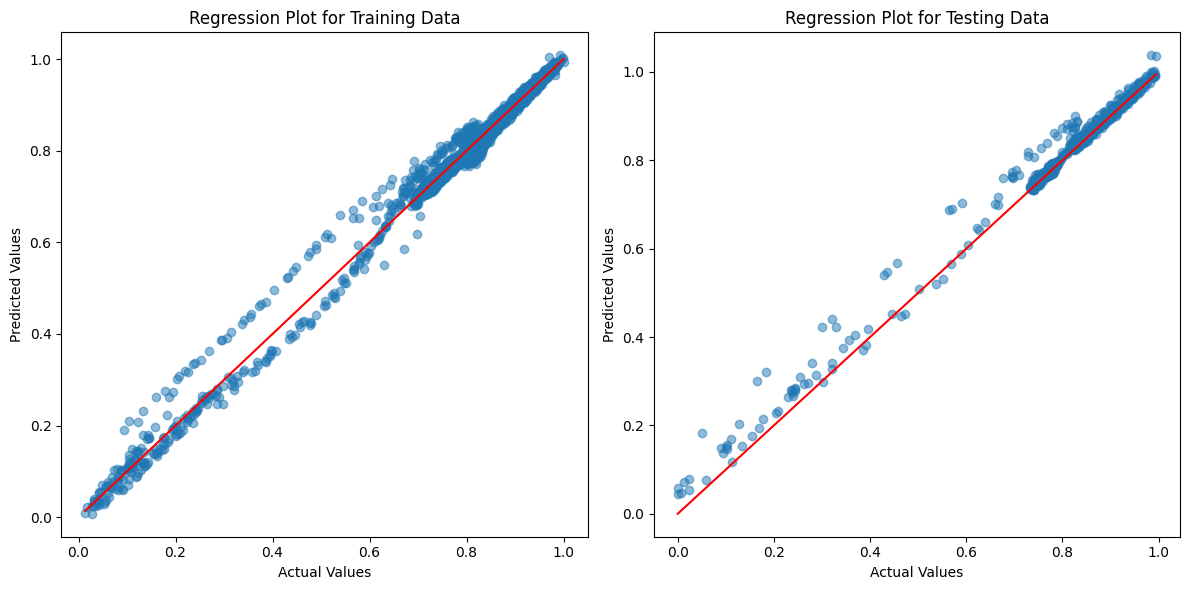

In [22]:
import matplotlib.pyplot as plt


# Plot regression for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_train_seq, train_predictions, alpha=0.5)
plt.title("Regression Plot for Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(Y_train_seq), max(Y_train_seq)], [min(Y_train_seq), max(Y_train_seq)], color='red')
# Plot regression for testing data
plt.subplot(1, 2, 2)
plt.scatter(Y_test_seq, test_predictions, alpha=0.5)
plt.title("Regression Plot for Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(Y_test_seq), max(Y_test_seq)], [min(Y_test_seq), max(Y_test_seq)], color='red')

plt.tight_layout()
plt.show()
